<a href="https://colab.research.google.com/github/Shrusti23/EE258_neural-networks/blob/master/MNIST_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from google.colab import drive
drive.mount('/content/drive')
# Adding column names for dataframes
colnames = ['label']
for i in range(1, 785):
  colnames += ['pixel'+str(i)]
  
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_train.csv', names = colnames, header=None)
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
X_train.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Y_train.head()


0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [0]:
X_train = X_train.astype('float32')/ 255.0


In [0]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
    


In [0]:
#plot_digits(X_train, Y_train)

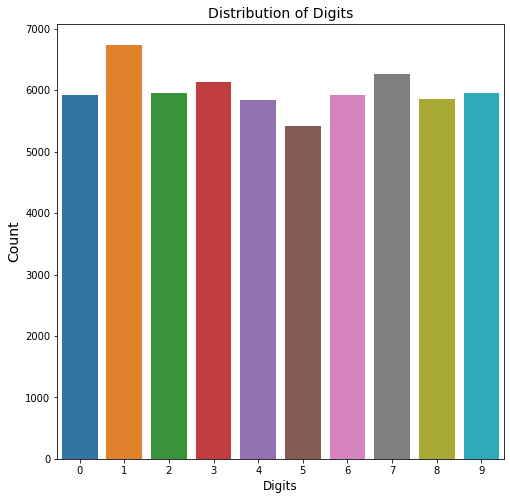

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()


In [0]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [0]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [0]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [0]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [0]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [0]:
mo=model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=20, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Epoch 1/20
582/582 [==============================] - 20s 34ms/step - loss: 0.3819 - accuracy: 0.8821 - val_loss: 0.1081 - val_accuracy: 0.9617
Epoch 2/20
  6/582 [..............................] - ETA: 15s - loss: 0.1953 - accuracy: 0.9417

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


582/582 [==============================] - 20s 34ms/step - loss: 0.1200 - accuracy: 0.9640 - val_loss: 0.0543 - val_accuracy: 0.9833
Epoch 3/20
582/582 [==============================] - 20s 35ms/step - loss: 0.0834 - accuracy: 0.9736 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 4/20
582/582 [==============================] - 20s 34ms/step - loss: 0.0677 - accuracy: 0.9795 - val_loss: 0.0310 - val_accuracy: 0.9928
Epoch 5/20
582/582 [==============================] - 20s 34ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0263 - val_accuracy: 0.9889
Epoch 6/20
582/582 [==============================] - 20s 34ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0219 - val_accuracy: 0.9933
Epoch 7/20
582/582 [==============================] - 20s 34ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0177 - val_accuracy: 0.9939
Epoch 8/20
582/582 [==============================] - 20s 34ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0274 - val_accuracy: 0.9900
Epo

In [0]:
score = model.evaluate(X_val, T_val, batch_size=32)


1800/1800 [==============================] - 0s 94us/step


In [0]:
score[1]


0.996666669845581

In [0]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_test.csv', names = colnames, header=None)
X_test = np.array(df_test)
X_test = X_test.astype('object') /255.0

In [0]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

ValueError: ignored

In [0]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

[0.10814026577605142, 0.054264979954395026, 0.03214228215316931, 0.030975917897497613, 0.026314325553054612, 0.021885446208115254, 0.01767147761873073, 0.02737240788863144, 0.02082205638806853, 0.024542004920982033, 0.02239886451732471, 0.01736478847063457, 0.01821076634223573, 0.016299354465445504, 0.01721406353559966, 0.026121730321190424, 0.021571456257434975, 0.02070768978511397, 0.011151104446778644, 0.01463516032446124]
[0.9616666436195374, 0.9833333492279053, 0.9894444346427917, 0.9927777647972107, 0.9888888597488403, 0.9933333396911621, 0.9938889145851135, 0.9900000095367432, 0.9938889145851135, 0.9911110997200012, 0.9927777647972107, 0.9938889145851135, 0.9944444298744202, 0.9944444298744202, 0.995555579662323, 0.9905555844306946, 0.992222249507904, 0.9927777647972107, 0.9961110949516296, 0.996666669845581]
[0.3819036560190707, 0.12003528382917195, 0.08336251963864487, 0.06774567149713942, 0.05761503707737537, 0.051598138365529705, 0.045149966477515666, 0.03929687119921176, 0.

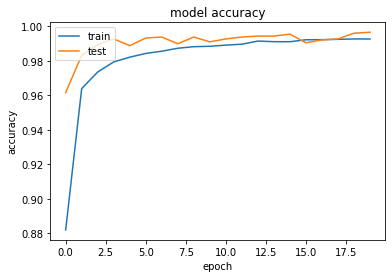

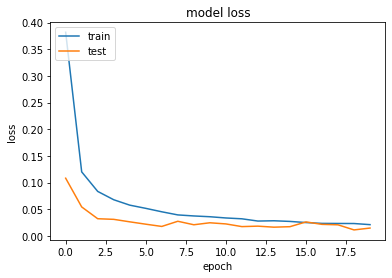

In [0]:
    print(mo.history['val_loss'])
    print(mo.history['val_accuracy'])
    print(mo.history['loss'])
    print(mo.history['accuracy'])

    import matplotlib.pyplot as plt
    plt.plot(mo.history['accuracy']) 
    plt.plot(mo.history['val_accuracy'])
    plt.title('model accuracy') 
    plt.ylabel('accuracy') 
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(mo.history['loss'])
    plt.plot(mo.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
! pip install virtualenv

!pip install --upgrade wandb

import wandb

wandb.init(sync_tensorboard=True)

Requirement already up-to-date: wandb in /usr/local/lib/python3.6/dist-packages (0.8.32)


W&B Run: https://app.wandb.ai/shrusti/uncategorized/runs/25q436so